In [1]:
!pip install pyspellchecker
!pip install scattertext
!pip install nltk 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 11.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 12.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for spacy>=3.2 from https://files.pythonhosted.org/packages/e0/f1/8a7701df03bf725a1469659bcecef181eeef6ba011103439ba4dde1fdaf8/spacy-3.7.2-cp39-cp39-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/d4/49/c128af7bc4c6679649f2b7f9a72e9c052b92c5196469645924d9f4f0f086/murmurhash-1.0.10-cp39-cp39-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/

In [4]:
!pip install wordcloud  

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/07/18/9e2bc9d5ee2c88514f368c8ccc82aae4f07392ccda41dc1706fe4cf52a0e/wordcloud-1.9.3-cp39-cp39-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 3.4 MB/s eta 0:00:00a 0:00:01


In [5]:
import re
from tqdm.notebook import tqdm
import pandas as pd 
import numpy as np
from datetime import datetime

# Import NLP Libraries
import nltk
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

# Import Visualization Libraries
import plotly.offline as pyo 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns 
import scattertext as st
from IPython.display import IFrame
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import random 

# Downloading periphrals
nltk.download('vader_lexicon')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')  

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/cegrib/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cegrib/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# Intializate our tools 
sns.set_style('darkgrid')

# For sentiment analysis 
sia = SIA() 

# To identify misspelled words
spell = SpellChecker() 

# To display plotly graphs 
pyo.init_notebook_mode() 
 

In [9]:
 # Storing csv dataset into a dataframe
df = pd.read_csv("/Users/cegrib/Downloads/archive-97/mpox-09-03-2022.csv").drop('Unnamed: 0', axis=1)
df.head(10)  

date      time                   id   
0  2022-09-03  23:57:12  1566092956590825473  \
1  2022-09-03  23:56:23  1566092753552830464   
2  2022-09-03  23:56:19  1566092737182572545   
3  2022-09-03  23:55:38  1566092564884758529   
4  2022-09-03  23:55:37  1566092559176404995   
5  2022-09-03  23:55:07  1566092434102419458   
6  2022-09-03  23:54:30  1566092277449113602   
7  2022-09-03  23:54:20  1566092237460480001   
8  2022-09-03  23:54:11  1566092200504696832   
9  2022-09-03  23:54:03  1566092166119710726   

                                               tweet language  replies_count   
0  @xXyotebro420Xx That's fucked... I feel bad fo...       en              0  \
1  Monkeypox slows in UK, US as CDC notes diagnos...       en              0   
2  @Monkeypoxtally Worldwide Monkeypox Case Timel...       en              0   
3  @mattant13 @mbasscatcher @justina7loren Won't ...       en              0   
4  Portland preschool teacher with history of mon...       en              0   
5       @BetoORourke So how is the monkey pox going?       en              0   
6  @naeQrashae next thing yk that’s fine be what ...       en              1   
7  @BetoORourke Did your Monkeypox clear up? You ...       en              0   
8         @wendy_resists Only if I had Monkeypox....       en              0   
9  Evidence is growing that monkeypox, like Covid...       en              0   

   retweets_count  likes_count  
0               0            0  
1               0            0  
2               0            0  
3               0            0  
4               0            0  
5               0            0  
6               0            0  
7               0            0  
8               0            0  
9               1            0

In [10]:
data = df.copy()
data['original_tweet'] = df['tweet']
data['datetime'] = df["date"] + " " + df["time"]
data = data.drop(['date', 'time'], axis=1)
data['datetime'] = data.datetime.apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
rt_mask = data.tweet.apply(lambda x: "RT @" in x)  

In [11]:
# standard tweet preprocessing 
data.tweet =data.tweet.str.lower()
#Remove twitter handlers
data.tweet = data.tweet.apply(lambda x:re.sub('@[^\s]+','',x))
#remove hashtags
data.tweet = data.tweet.apply(lambda x:re.sub(r'\B#\S+','',x))
# Remove URLS
data.tweet = data.tweet.apply(lambda x:re.sub(r"http\S+", "", x))
# Remove all the special characters
data.tweet = data.tweet.apply(lambda x:' '.join(re.findall(r'\w+', x)))
#remove all single characters
data.tweet = data.tweet.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
# Substituting multiple spaces with single space
data.tweet = data.tweet.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I)) 

In [12]:
# Viewing the preprocessed data
data 

id                                              tweet   
0     1566092956590825473  thatfuckedfeel bad for him but the dark humor ...  \
1     1566092753552830464  monkeypox slows in uk us as cdc notes diagnosi...   
2     1566092737182572545  worldwide monkeypox case timeline may 6 1st ca...   
3     1566092564884758529                            woncatch the monkey pox   
4     1566092559176404995  portland preschool teacher with history of mon...   
...                   ...                                                ...   
2731  1565852164790034432  whether we talking bout or black amp brown com...   
2732  1565852101628002304  the world health organization has declared mon...   
2733  1565852094023753729  ukraine covid and monkeypox biden asks congres...   
2734  1565852071290716164  biden regime begs for another 47b for monkeypo...   
2735  1565852070422388737  monkeypox 10 4 dos casos suspeitos foram confi...   

     language  replies_count  retweets_count  likes_count   
0          en              0               0            0  \
1          en              0               0            0   
2          en              0               0            0   
3          en              0               0            0   
4          en              0               0            0   
...       ...            ...             ...          ...   
2731       en              0               2            6   
2732       en              0               0            1   
2733       en              0               0            0   
2734       en              0               0            0   
2735       pt              0               1            8   

                                         original_tweet            datetime  
0     @xXyotebro420Xx That's fucked... I feel bad fo... 2022-09-03 23:57:12  
1     Monkeypox slows in UK, US as CDC notes diagnos... 2022-09-03 23:56:23  
2     @Monkeypoxtally Worldwide Monkeypox Case Timel... 2022-09-03 23:56:19  
3     @mattant13 @mbasscatcher @justina7loren Won't ... 2022-09-03 23:55:38  
4     Portland preschool teacher with history of mon... 2022-09-03 23:55:37  
...                                                 ...                 ...  
2731  Whether we talking bout #COVID or #Monkeypox, ... 2022-09-03 08:00:22  
2732  The World Health Organization has declared mon... 2022-09-03 08:00:07  
2733  Ukraine, COVID, And Monkeypox: Biden Asks Cong... 2022-09-03 08:00:05  
2734  Biden Regime Begs For Another $47B… For Monkey... 2022-09-03 08:00:00  
2735  Monkeypox: 10,4% dos casos suspeitos foram con... 2022-09-03 08:00:00  

[2736 rows x 8 columns]

**Sentiment Analysis

In [13]:
def label_sentiment(x:float):
    if x < -0.05 : return 'negative'
    if x > 0.35 : return 'positive'
    return 'neutral'

# Feature Extraction
data['words'] = data.tweet.apply(lambda x:re.findall(r'\w+', x ))
data['errors'] = data.words.apply(spell.unknown)
data['errors_count'] = data.errors.apply(len)
data['words_count'] = data.words.apply(len)
data['sentence_length'] = data.tweet.apply(len)
data['hour'] = data.datetime.apply(lambda x: x.hour)
data['date'] = data.datetime.apply(lambda x: x.date())
data['month'] = data.datetime.apply(lambda x: x.month)
data['year'] = data.datetime.apply(lambda x: x.year)


# Extract Sentiment Values for each tweet 
data['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(data['tweet'])]
data['overall_sentiment'] = data['sentiment'].apply(label_sentiment); 

  0%|          | 0/2736 [00:00<?, ?it/s]

 **Exploratory Data Analysis

In [14]:
# Check the number rows per column
data.count() 

id                   2736
tweet                2736
language             2736
replies_count        2736
retweets_count       2736
likes_count          2736
original_tweet       2736
datetime             2736
words                2736
errors               2736
errors_count         2736
words_count          2736
sentence_length      2736
hour                 2736
date                 2736
month                2736
year                 2736
sentiment            2736
overall_sentiment    2736
dtype: int64

In [15]:
  # Check for missing values
data.isna().sum() 

id                   0
tweet                0
language             0
replies_count        0
retweets_count       0
likes_count          0
original_tweet       0
datetime             0
words                0
errors               0
errors_count         0
words_count          0
sentence_length      0
hour                 0
date                 0
month                0
year                 0
sentiment            0
overall_sentiment    0
dtype: int64

In [17]:
 data.describe() 

id  replies_count  retweets_count  likes_count   
count  2.736000e+03    2736.000000     2736.000000  2736.000000  \
mean   1.565973e+18       0.349415        0.523392     2.312135   
min    1.565852e+18       0.000000        0.000000     0.000000   
25%    1.565901e+18       0.000000        0.000000     0.000000   
50%    1.565974e+18       0.000000        0.000000     0.000000   
75%    1.566044e+18       0.000000        0.000000     1.000000   
max    1.566093e+18      20.000000      103.000000   351.000000   
std    7.513763e+13       1.070454        3.708605    12.398346   

                            datetime  errors_count  words_count   
count                           2736   2736.000000  2736.000000  \
mean   2022-09-03 16:02:15.635234048      2.832602    16.880482   
min              2022-09-03 08:00:00      0.000000     0.000000   
25%    2022-09-03 11:14:45.249999872      1.000000     8.000000   
50%       2022-09-03 16:04:47.500000      2.000000    13.000000   
75%    2022-09-03 20:40:54.750000128      3.000000    24.000000   
max              2022-09-03 23:57:12     39.000000    77.000000   
std                              NaN      3.640687    12.041669   

       sentence_length         hour   month    year    sentiment  
count      2736.000000  2736.000000  2736.0  2736.0  2736.000000  
mean         99.472222    15.558114     9.0  2022.0    -0.027236  
min           0.000000     8.000000     9.0  2022.0    -0.983200  
25%          45.000000    11.000000     9.0  2022.0    -0.273200  
50%          76.000000    16.000000     9.0  2022.0     0.000000  
75%         141.000000    20.000000     9.0  2022.0     0.025800  
max         276.000000    23.000000     9.0  2022.0     0.946000  
std          70.491904     4.970581     0.0     0.0     0.354627

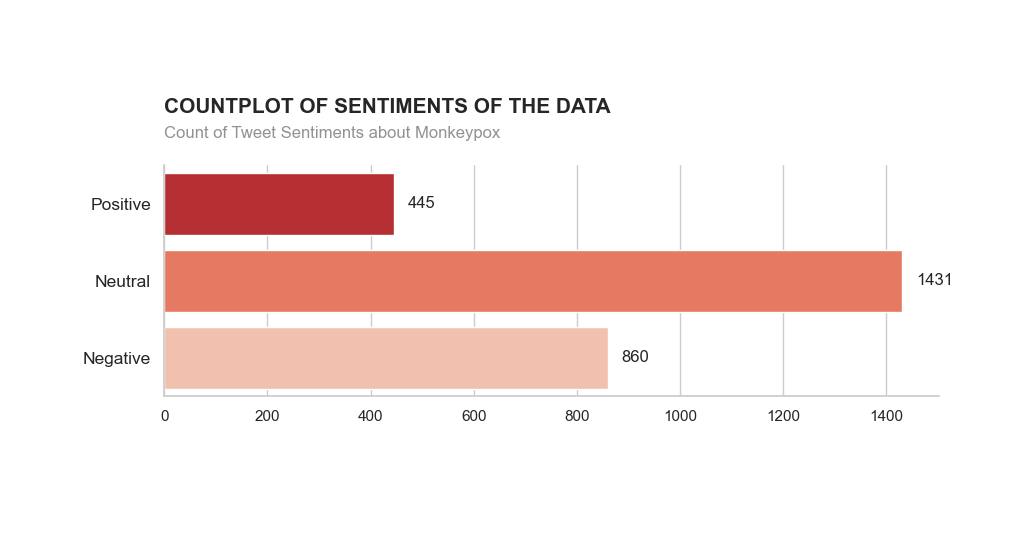

In [25]:
def plot_countplot(data=None, x=None, y=None, palette='Reds_r', height=15, title=' ', subtitle=' ', description=' '):
    sns.set(style = 'whitegrid',
            rc = {'figure.figsize': (10,height)})

    g = sns.countplot(data=data, y=y, x=x, palette=palette)

    g.set_ylabel(' \n\n\n')
    g.set_xlabel(' \n\n\n\n\n')

    g.set_title(
        f'\n\n\n\n{title}\n\n'.upper(),
        loc = 'left',
        fontdict = dict(
            fontsize = 15,
            fontweight = 'bold'))

    g.set_yticklabels(
        [tick_label.get_text().title() for tick_label in g.get_yticklabels()],
        fontdict = dict(
            fontsize = 12.5,
            fontweight = 'medium'))

    plt.text(s = f'{subtitle}',
             alpha = 0.5,
             x = 0,
             y = 1.12,
             horizontalalignment = 'left',
             transform = g.transAxes)

    plt.text(s = f'{description}',
             alpha = 0.5,
             x = 0,
             y = -.18,
             verticalalignment = 'baseline',
             horizontalalignment = 'left',
             transform = g.transAxes)

    g.bar_label(container = g.containers[0], padding = 10,)

    plt.text(s = ' ', x = 1.08, y = 1, transform = g.transAxes)

    sns.despine()

    return g

plot_countplot(y = data['overall_sentiment'],
               title = 'Countplot of Sentiments of the data',
               subtitle='Count of Tweet Sentiments about Monkeypox',
               height = 3);   

** Sentence Length and Wordcount Weighted Average

In [22]:
 # Helper Function to get the running average 
def get_weighted(series: pd.Series, beta=0.9):
    weighted = pd.Series(dtype=float)
    weighted[series.index[0]] = 0 
    for i in range(1, len(series)):
        current = series.iloc[i]
        previous = weighted.iloc[i-1]
        date = series.index[i]
        weighted[date] = beta*previous + (1-beta)*current
    return weighted 

# Get a two-line title for our plots
def get_multi_line_title(title:str, subtitle:str):
    return f"{title}<br><sub>{subtitle}</sub><br>" 

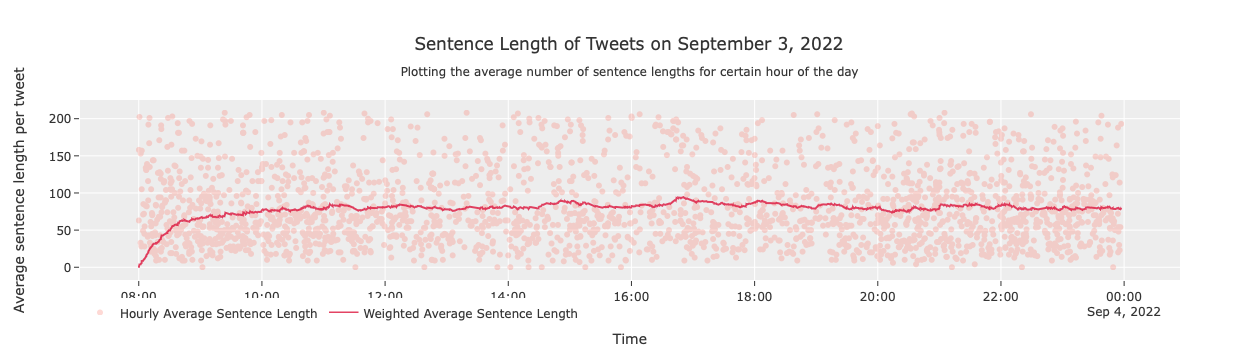

In [26]:
 title = get_multi_line_title(
    "Sentence Length of Tweets on September 3, 2022", 
    "Plotting the average number of sentence lengths for certain hour of the day"
)

beta = 0.99 #higher value -> smoother curve

length = data.groupby('datetime')['sentence_length'].mean()
length_std = length.std()
length = length[length < 3*length_std]

weighted_length = get_weighted(length, beta)

fig = go.Figure([
    go.Scatter(
        name="Hourly Average Sentence Length",
        x=length.index, 
        y=length.values,
        mode="markers",
        opacity=0.3,
        marker_color="salmon"
    ), 
    go.Scatter(
        name="Weighted Average Sentence Length",
        x=weighted_length.index, 
        y=weighted_length.values,
        opacity=0.8,
        marker_color='crimson'
    ),
])

fig.update_layout(
    hovermode='x',
    title=title,
    xaxis_title="Time",
    yaxis_title="Average sentence length per tweet",
    template="ggplot2",
    legend_orientation = 'h'
)

fig.show()  

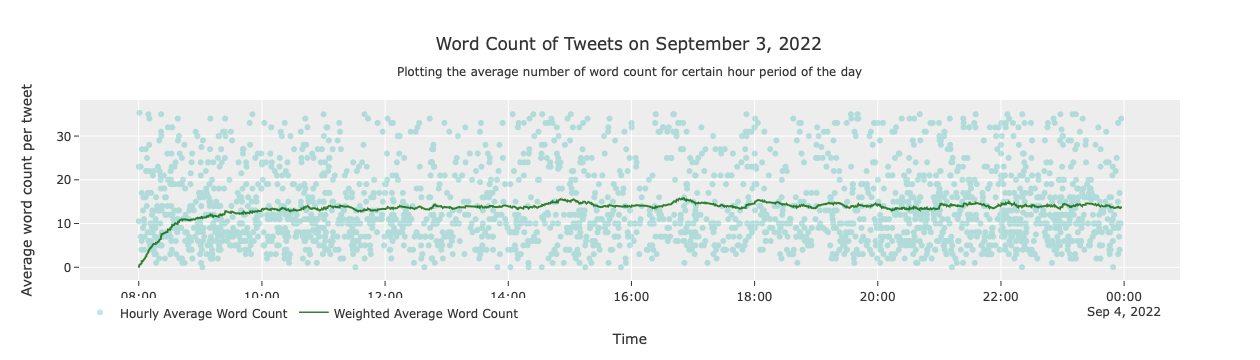

In [27]:
title = get_multi_line_title(
    "Word Count of Tweets on September 3, 2022", 
    "Plotting the average number of word count for certain hour period of the day"
)

beta = 0.99 #higher value -> smoother curve

length = data.groupby('datetime')['words_count'].mean()
length_std = length.std()
length = length[length < 3*length_std]

weighted_length = get_weighted(length, beta)

fig = go.Figure([
    go.Scatter(
        name="Hourly Average Word Count",
        x=length.index, 
        y=length.values,
        mode="markers",
        opacity=0.3,
        marker_color="lightseagreen"
    ), 
    go.Scatter(
        name="Weighted Average Word Count",
        x=weighted_length.index, 
        y=weighted_length.values,
        opacity=0.8,
        marker_color='darkgreen'
    ),
])

fig.update_layout(
    hovermode='x',
    title=title,
    xaxis_title="Time",
    yaxis_title="Average word count per tweet",
    template="ggplot2",
    legend_orientation = 'h'
)

fig.show()  

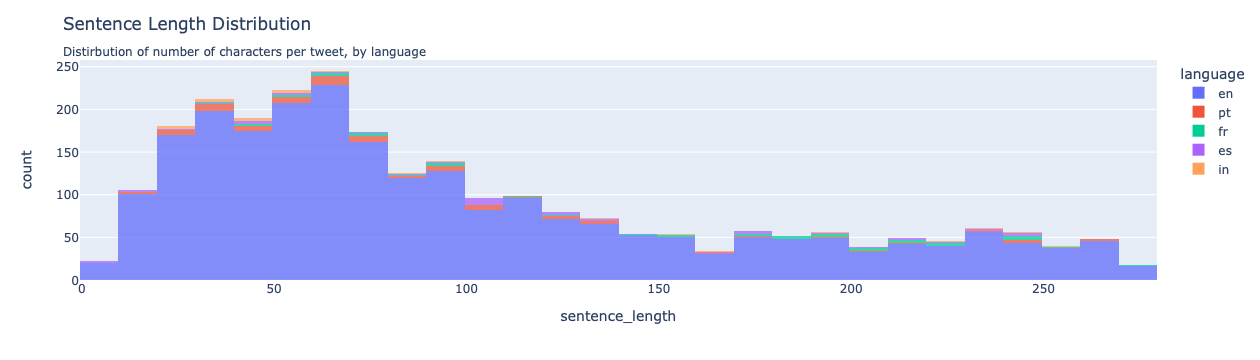

In [28]:
df_copy = data.copy()

title = get_multi_line_title("Sentence Length Distribution", "Distirbution of number of characters per tweet, by language")
data = df_copy[df_copy['tweet'].apply(len) != 0]
top_devices = data.groupby('language')['tweet'].count().sort_values(ascending=False)[:5].index.tolist()
data = data[data['language'].apply(lambda x: x in top_devices)]
fig = px.histogram(data, x="sentence_length", color="language", opacity=0.75)
fig.update_layout(hovermode='x', title=title)
fig.show()  

 **Number of activities per hour

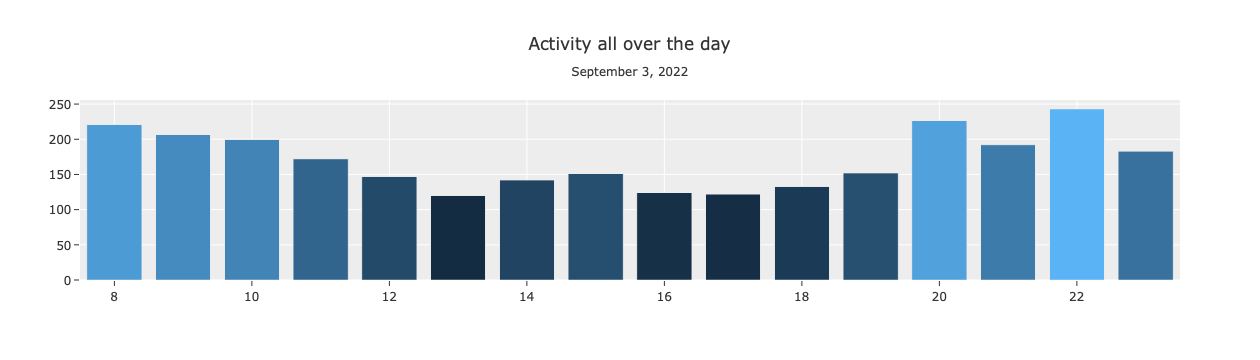

In [29]:
title = get_multi_line_title(
    "Activity all over the day", 
    "September 3, 2022")

annual_counts = pd.DataFrame(df_copy['hour'].value_counts()).reset_index()
annual_counts.columns = ['hour', 'count']
annual_counts = annual_counts[annual_counts['hour'] != 2021]

fig = go.Figure(go.Bar(
    name="Annual Count", 
    x=annual_counts.hour, 
    y=annual_counts['count'], 
    marker_color=annual_counts['count'] 
))
fig.update_layout(template='ggplot2', title=title)
fig.show(); 

**Sentiment Distributions

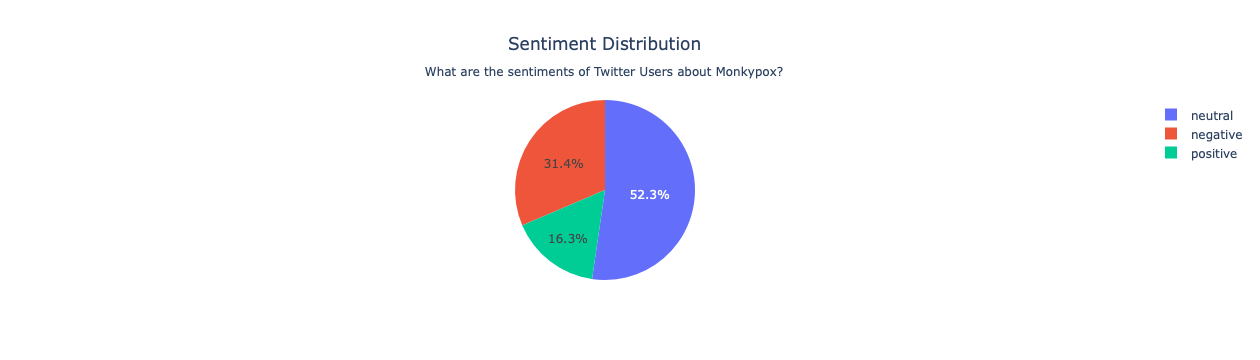

In [35]:
title = get_multi_line_title(
    'Sentiment Distribution',
    "What are the sentiments of Twitter Users about Monkypox?"
)

sentiment_pie = pd.DataFrame(df_copy['overall_sentiment'].value_counts() / df_copy.shape[0]*100).reset_index()
sentiment_pie.columns = ['Sentiment', 'Percentage']
fig = px.pie(sentiment_pie, values='Percentage', names='Sentiment', title=title)

fig.update_layout(
title=title, title_x=0.48)

fig.show() 

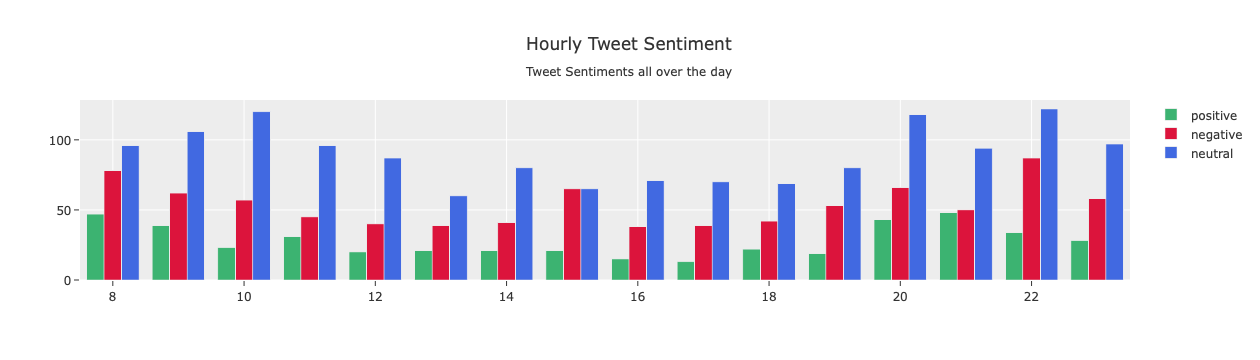

In [36]:
sentiment_over_time = df_copy.sort_values('hour')[['hour', 'sentiment', 'overall_sentiment']]
annual_sentiment = pd.DataFrame(sentiment_over_time.groupby('hour')['overall_sentiment'].value_counts())
annual_sentiment.columns = ['Count']
annual_sentiment = annual_sentiment.reset_index()

title = get_multi_line_title('Hourly Tweet Sentiment', "Tweet Sentiments all over the day")
years = annual_sentiment.hour.unique().tolist()
sents = {'positive' : 'mediumseagreen', 'negative': 'crimson', 'neutral': 'royalblue'}

sentiment_bars = [] 
for s in sents.keys():
    current_year = annual_sentiment[annual_sentiment.overall_sentiment == s]
    sentiment_bars.append(
        go.Bar(name=s, x=current_year.hour, y=current_year.Count, marker_color = sents[s])
    )
    
    
fig = go.Figure(sentiment_bars)
fig.update_layout(template='ggplot2', title=title)
fig.show() 

**Wordcloud of Sentiments

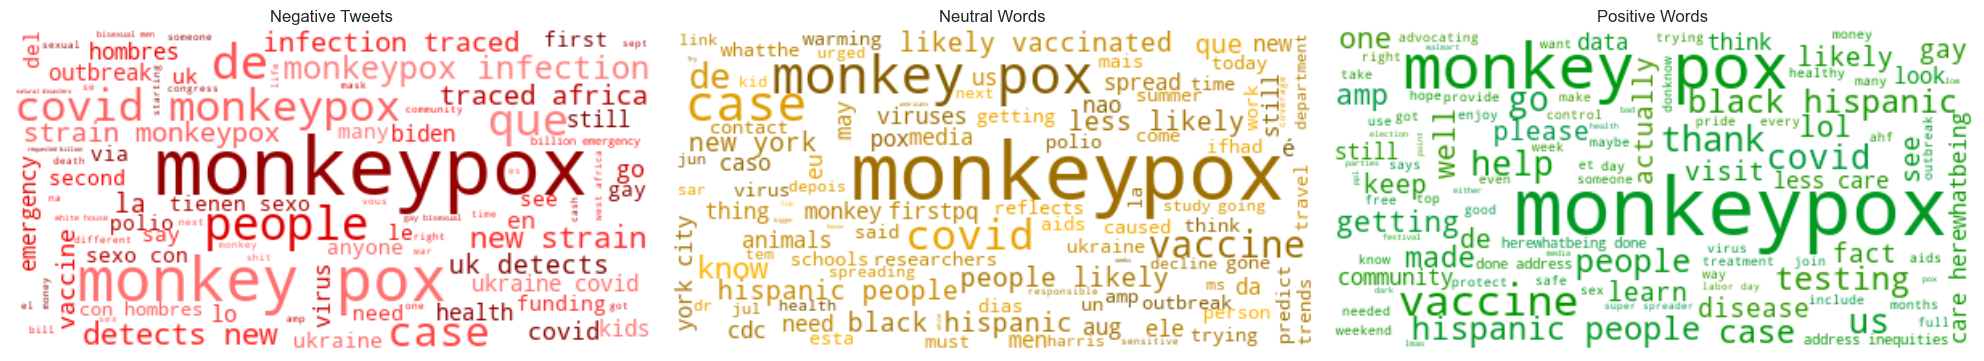

In [37]:
def flatten_list(l):
    return [x for y in l for x in y]

# color coding our wordclouds 
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(1,3, figsize=(20,10))
    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Tweets")
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")
    
    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show();

    
sentiment_sorted= data.sort_values('hour', ascending=False)
positive_top_100 = sentiment_sorted[sentiment_sorted['overall_sentiment'] == "positive"].iloc[:100]
negative_top_100 = sentiment_sorted[sentiment_sorted['overall_sentiment'] == "negative"].iloc[:100]
neutral_top_100 = sentiment_sorted[sentiment_sorted['overall_sentiment'] == "neutral"].iloc[:100]

cleanup = lambda x: [y for y in x.split() if y not in stopwords.words('english')]
neg_doc = flatten_list(negative_top_100['tweet'].apply(cleanup))
pos_doc = flatten_list(positive_top_100['tweet'].apply(cleanup))
neu_doc = flatten_list(neutral_top_100['tweet'].apply(cleanup))

generate_word_clouds(neg_doc, neu_doc, pos_doc) 